In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
census = pd.read_csv("../data/census.csv")

The above data set is a cleaned census extract pulled from the UCI Machine Learning repository. You can find out more about the data set here: http://archive.ics.uci.edu/ml/datasets/Census+Income

We will perform some relatively simple analysis like the one we performed this week.

In [3]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,59,Private,307423,9th,5,Never-married,Other-service,Not-in-family,Black,Male,0,0,50,United-States,0
1,32,Private,192965,HS-grad,9,Separated,Sales,Not-in-family,White,Female,0,0,45,United-States,0
2,19,Private,125591,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,40,United-States,0
3,51,Without-pay,124963,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,0
4,57,Self-emp-inc,146103,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,15024,0,30,United-States,1


First plot a histogram of the ages in the data set.

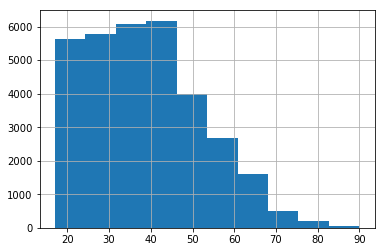

In [5]:
census['age'].hist()

Now plot a histogram of the number of years of education. This is the `education-num` column.

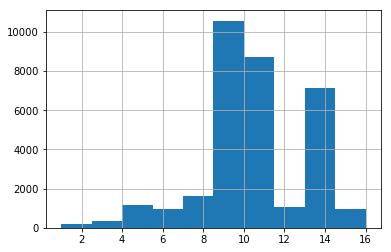

In [6]:
census['education-num'].hist()

Now plot a horizontal bar plot of the counts of marital status.

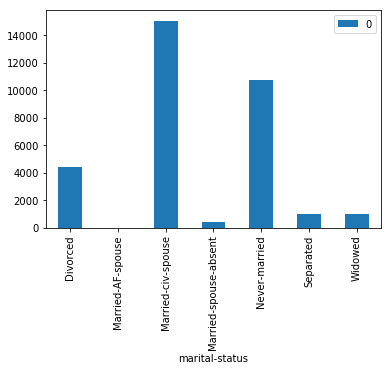

In [20]:
pd.DataFrame(census.groupby('marital-status').size()).plot(kind='bar')

What is the average age of the divorced group? The standard deviation? The min? The max? The interquartile range?

In [30]:
print(census.groupby('marital-status').get_group('Divorced')['age'].mean())
print(census.groupby('marital-status').get_group('Divorced')['age'].std())
print(census.groupby('marital-status').get_group('Divorced')['age'].min())
print(census.groupby('marital-status').get_group('Divorced')['age'].max())
print(census.groupby('marital-status').get_group('Divorced')['age'].describe())



43.277965338735086
10.537445427966851
19
90
count    4443.000000
mean       43.277965
std        10.537445
min        19.000000
25%        36.000000
50%        43.000000
75%        50.000000
max        90.000000
Name: age, dtype: float64


What is the average age of the Never-married group? The standard deviation? The min? The max? The interquartile range?

In [32]:
print(census.groupby('marital-status').get_group('Never-married')['age'].mean())
print(census.groupby('marital-status').get_group('Never-married')['age'].std())
print(census.groupby('marital-status').get_group('Never-married')['age'].min())
print(census.groupby('marital-status').get_group('Never-married')['age'].max())
print(census.groupby('marital-status').get_group('Never-married')['age'].describe())

28.06251746948663
9.86052118336745
17
90
count    10733.000000
mean        28.062517
std          9.860521
min         17.000000
25%         21.000000
50%         25.000000
75%         32.000000
max         90.000000
Name: age, dtype: float64


How many different distinct occupations are there in the data set?

In [41]:
census['occupation'].unique().size

15

What is the average age for each occupation?

In [43]:
census.groupby('occupation').mean()['age']

occupation
?                    39.772267
Adm-clerical         37.343148
Armed-Forces         30.583333
Craft-repair         38.966005
Exec-managerial      42.313888
Farming-fishing      41.182347
Handlers-cleaners    32.415040
Machine-op-inspct    37.710194
Other-service        35.128614
Priv-house-serv      42.182927
Prof-specialty       40.519697
Protective-serv      38.500000
Sales                37.702406
Tech-support         37.375130
Transport-moving     40.855330
Name: age, dtype: float64

For the farm-fishing occupation, plot a histogram of the capital gains.

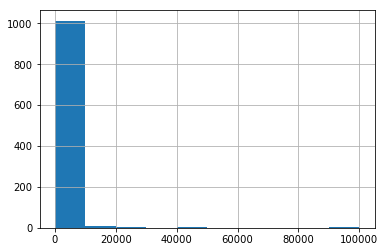

In [46]:
census.groupby('occupation').get_group('Farming-fishing')['capital-gain'].hist()

Plot the average and maximum capital loss for each grouping of `hours-per-week`.

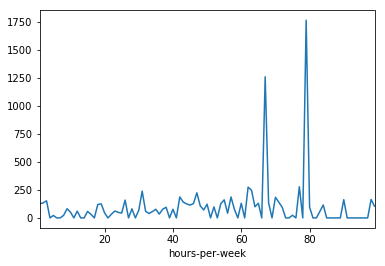

In [51]:
census.groupby('hours-per-week').mean()['capital-loss'].plot()

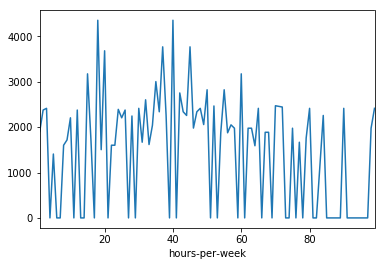

In [52]:
census.groupby('hours-per-week').max()['capital-loss'].plot()